In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets, layers, models

2024-06-23 05:34:04.113535: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-23 05:34:04.466557: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 05:34:05.628610: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Preprocessing data

In [2]:
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data() # X is digits Y is numbering

x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
classes[y_train[100]]

'ship'

In [7]:
def plot_sample(x,y,index):    
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

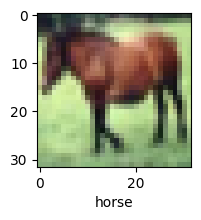

In [8]:
plot_sample(x_train,y_train,7)

## Normalize the data

In [9]:
x_train = x_train/255.0 # Normalize the images to [0,1] range
x_test = x_test/255.0 # Normalize the images to [0,1] range

y_train = y_train.reshape(len(x_train))
y_test = y_test.reshape(len(x_test))

In [10]:
# ann = models.Sequential([
#     layers.Flatten(input_shape=(32, 32, 3)),
#     layers.Dense(3000, activation='relu'),
#     layers.Dense(1000, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# ann.fit(x_train, y_train,epochs = 5)

## CNN

In [13]:
CNN = models.Sequential([
    # Convolutional layers
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # Dense layers
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

CNN.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4313 - loss: 1.5677
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6496 - loss: 0.9911
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7396 - loss: 0.7453
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8129 - loss: 0.5349
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8841 - loss: 0.3388
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9338 - loss: 0.2000
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9617 - loss: 0.1197
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9717 - loss: 0.0874
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0771
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9776 - loss: 0.0705


In [15]:
CNN.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 1.7321


[1.7585042715072632, 0.7106000185012817]

In [17]:
CNN.save('CIFAR.keras')

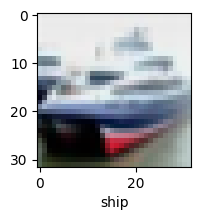

In [18]:
plot_sample(x_test, y_test, 1)

In [19]:
y_pred = CNN.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.1047755e-07, 2.3039759e-04, 6.6271532e-05, 9.9853790e-01,
        1.4082229e-08, 1.1210183e-03, 3.8016857e-05, 1.2524343e-09,
        6.7513685e-07, 5.0607746e-06],
       [2.5607977e-04, 3.4403941e-01, 1.0550939e-14, 3.9356487e-11,
        3.9268792e-17, 2.3459570e-16, 7.2216823e-14, 2.4299534e-17,
        6.5569746e-01, 7.0360852e-06],
       [3.0890277e-02, 4.3596473e-01, 7.3208883e-03, 7.4078669e-03,
        7.6509945e-02, 4.7930195e-03, 3.2416364e-04, 2.3158051e-03,
        4.3305761e-01, 1.4155841e-03],
       [6.3693517e-01, 1.3914543e-04, 3.5057402e-01, 5.9565163e-04,
        1.5684728e-04, 4.1921405e-14, 5.4506755e-09, 4.2967866e-07,
        1.1598610e-02, 3.2688774e-08],
       [4.1293119e-12, 3.4348989e-07, 6.0405211e-05, 5.0083522e-06,
        9.9989641e-01, 3.0445770e-07, 3.7403432e-05, 5.0198823e-15,
        4.9619797e-10, 1.4309955e-09]], dtype=float32)

In [21]:
y_classes = [np.argmax(elements) for elements in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [23]:
classes[y_classes[1]]

'ship'